<a href="https://colab.research.google.com/github/AIWalaBro/Complete_Machine_Learning/blob/main/Logistic_Regression/Softmax_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
new_df = df[['sepal_length','petal_length','species']]
new_df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [12]:
clf = LogisticRegression(multi_class='multinomial')

In [13]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print(accuracy_score(y_test, y_pred))

0.7666666666666667


In [16]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,13,1,0
1,0,4,4
2,0,2,6


In [21]:
import warnings

# Filter out a specific warning
warnings.filterwarnings("ignore")


In [23]:
# lets do the prediction on newly datapoints

query = np.array([[4.5,3.6]])
clf.predict_proba(query)

array([[0.98794357, 0.01048455, 0.00157188]])

In [22]:
clf.predict(query)

array([0])

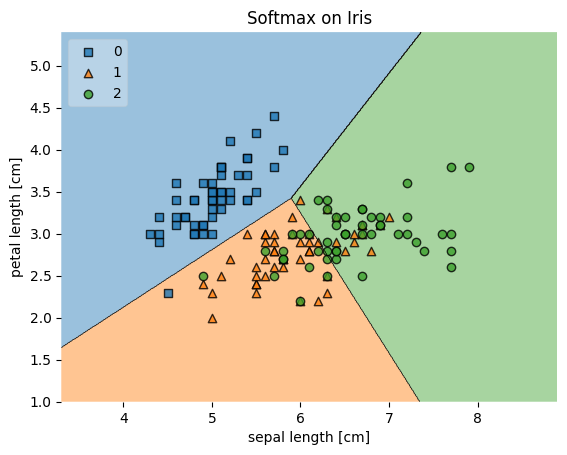

In [30]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()